# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [4]:
athletes = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [7]:
# Sua análise começa aqui.
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [12]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.6+ KB


In [10]:
athletes.shape

(11538, 11)

In [41]:
'''
Returns (Shapiro - help)
-------
W : float
    The test statistic.
p-value : float
    The p-value for the hypothesis test
'''

amostra = get_sample(athletes,'height',3000)
sct.shapiro(amostra)

(0.9961519837379456, 5.681722541339695e-07)

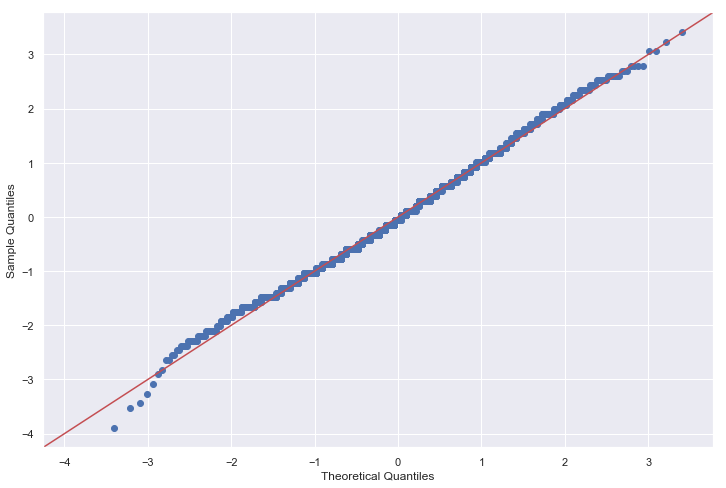

In [37]:
sm.qqplot(amostra, fit=True, line="45");

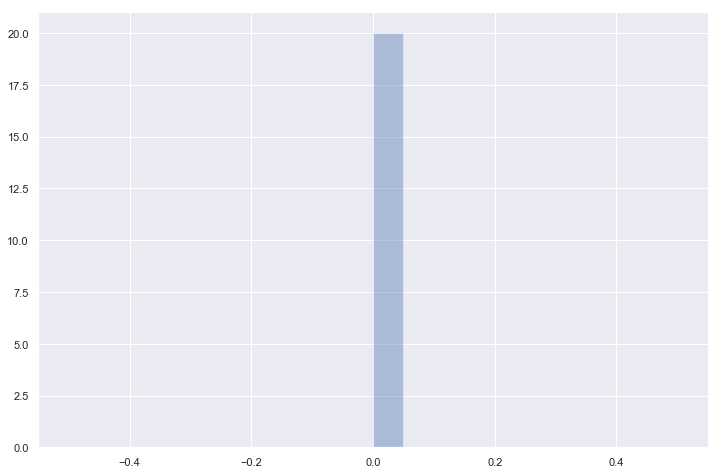

In [40]:
pvalues = []
for i in range(1000):
  pvalues.append(sct.ttest_1samp(amostra, popmean=5).pvalue)


sns.distplot(pvalues, kde=False, bins=20, hist_kws={"density": True});

In [86]:
athletes.nationality.unique()

array(['ESP', 'KOR', 'CAN', 'MDA', 'NZL', 'AUS', 'USA', 'ETH', 'BRN',
       'IOA', 'GBR', 'UZB', 'RSA', 'EGY', 'MAR', 'QAT', 'SUD', 'ALG',
       'DEN', 'NED', 'DJI', 'SEN', 'CMR', 'ITA', 'NIG', 'SWE', 'GHA',
       'AFG', 'AZE', 'KSA', 'BAN', 'NGR', 'RUS', 'IND', 'HUN', 'KAZ',
       'BDI', 'ERI', 'POL', 'BRA', 'GEO', 'CZE', 'SEY', 'GAM', 'LTU',
       'IRI', 'ROU', 'CUB', 'SLO', 'BAH', 'ARG', 'PUR', 'FRA', 'RWA',
       'TOG', 'MDV', 'TUN', 'ISR', 'LAT', 'JOR', 'MAS', 'LIB', 'LBA',
       'PLE', 'IRQ', 'TUR', 'VEN', 'JPN', 'TPE', 'KGZ', 'CHN', 'MEX',
       'GRE', 'IRL', 'JAM', 'SUI', 'BAR', 'HON', 'ANG', 'GER', 'COL',
       'URU', 'MNE', 'SRB', 'BUL', 'FIN', 'UKR', 'BLR', 'SMR', 'COK',
       'SAM', 'AUT', 'BEL', 'KEN', 'SVK', 'POR', 'ECU', 'UAE', 'NAM',
       'GUY', 'EST', 'SKN', 'ARU', 'PAN', 'PER', 'TAN', 'FIJ', 'GUI',
       'NOR', 'ARM', 'THA', 'SIN', 'TKM', 'CRO', 'BIH', 'TGA', 'MAW',
       'DOM', 'GUA', 'MKD', 'TJK', 'CYP', 'CHI', 'MLT', 'ZIM', 'TTO',
       'CRC', 'BOL',

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [71]:
def q1():
    # Retorne aqui o resultado da questão 1.
    alpha = 0.05
    amostra = get_sample(athletes,'height',3000)
    
    print('Retorno: ',sct.shapiro(amostra))
    p = sct.shapiro(amostra)[1]
    
    if p > alpha:
        return True
    else:
        return False
    
    pass

In [72]:
print(q1())
print(type(q1()))

('Retorno: ', (0.9961519837379456, 5.681722541339695e-07))
False
('Retorno: ', (0.9961519837379456, 5.681722541339695e-07))
<type 'bool'>


__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [73]:
def q2():
    # Retorne aqui o resultado da questão 2.
    alpha = 0.05
    amostra = get_sample(athletes,'height',3000)
    
    print('Retorno: ',sct.jarque_bera(amostra))
    
    p = sct.jarque_bera(amostra)[1]
    
    if p > alpha:
        return True
    else:
        return False
    
    pass

In [74]:
print(q2())
print(type(q2()))

('Retorno: ', (13.033635135942651, 0.001478366424594868))
False
('Retorno: ', (13.033635135942651, 0.001478366424594868))
<type 'bool'>


__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [75]:
def q3():
    # Retorne aqui o resultado da questão 3.
    alpha = 0.05
    amostra = get_sample(athletes,'weight',3000)
    
    print('Retorno: ',sct.normaltest(amostra))
    
    p = sct.normaltest(amostra)[1]
    
    if p > alpha:
        return True
    else:
        return False
    pass

In [76]:
print(q3())
print(type(q3()))

('Retorno: ', NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111))
False
('Retorno: ', NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111))
<type 'bool'>


__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

In [ ]:
#BoxPlot

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [83]:
def q4():
    # Retorne aqui o resultado da questão 4.
    alpha = 0.05
    amostra_log = np.log(get_sample(athletes,'weight',3000))
    
    print('Retorno: ',sct.normaltest(amostra_log))
    
    p = sct.normaltest(amostra_log)[1]
    
    if p > alpha:
        return True
    else:
        return False
    pass

In [84]:
print(q4())
print(type(q4()))

('Retorno: ', NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10))
False
('Retorno: ', NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10))
<type 'bool'>


__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

In [173]:
alpha = 0.05

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [177]:
bra = athletes[athletes['nationality'] == 'BRA'].reset_index()
usa = athletes[athletes['nationality'] == 'USA'].reset_index()
can = athletes[athletes['nationality'] == 'CAN'].reset_index()

In [184]:
def q5():
    # Retorne aqui o resultado da questão 5.

    print('Retorno: ',sct.ttest_ind(bra.height, usa.height,nan_policy='omit'))
    
    p = sct.ttest_ind(bra.height, usa.height,equal_var = False,nan_policy='omit')[1] 
    
    if p > alpha:
        return True
    else:
        return False
    
    pass

In [185]:
print(q5())
print(type(q5()))

('Retorno: ', Ttest_indResult(statistic=-3.2197616412698205, pvalue=0.0013229277795920673))
False
('Retorno: ', Ttest_indResult(statistic=-3.2197616412698205, pvalue=0.0013229277795920673))
<type 'bool'>


## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [180]:
def q6():
    # Retorne aqui o resultado da questão 6.
    print('Retorno: ',sct.ttest_ind(bra.height, can.height,nan_policy='omit'))
    
    p = sct.ttest_ind(bra.height, usa.height,equal_var = False,nan_policy='omit')[1] 
    
    if p > alpha:
        return True
    else:
        return False

    pass

In [181]:
print(q6())
print(type(q6()))

('Retorno: ', Ttest_indResult(statistic=0.6396212192621117, pvalue=0.5226033826111448))
False
('Retorno: ', Ttest_indResult(statistic=0.6396212192621117, pvalue=0.5226033826111448))
<type 'bool'>


## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [182]:
def q7():
    # Retorne aqui o resultado da questão 7.
    
    p = sct.ttest_ind(usa.height, can.height,equal_var = False,nan_policy='omit')[1] 
    
    return np.float(p.round(8))

    pass

In [183]:
print(q7())
print(type(q7()))

0.00046601
<type 'float'>


__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?